In [1]:
import requests
import time
import matplotlib.pyplot as plt

# NY Times

In [2]:
# NY TIMES API 
ny_api_key = 'gkHhhsov9LrY3D0rs7UybUHaytbIAmve'

## Get relevant article type distribution

In [4]:
# Getting all relevant articles for last 5 years
all_articles = []
stats_dict = {}
article_filter = ['News', 'Op-Ed', 'News Analysis', 'Editorial']
year_totals = []

for year in range(2016,2021):
    print("Year:",year,end='')
    count_total = 0
    count_relevant = 0
    # Initializing the stats_dict structure
    stats_dict[year] = {}
    for type_ in article_filter:
        stats_dict[year][type_]= 0

    for month in range(1,13):
        print(".",end='')
        time.sleep(6) # Adding time delay to not hit API calls per minute limit
        url = 'https://api.nytimes.com/svc/archive/v1/'+str(year)+'/'+str(month)+'.json?&api-key='+ny_api_key
        response = requests.get(url)
        if response.status_code !=200:
            print("API Error!\n")
            break
        articles = response.json()['response']['docs']
        # Filtering articles which have 'type_of_material' key
        articles = [a for a in articles if 'type_of_material' in a]
        relevant_articles = [a for a in articles if a['type_of_material'] in article_filter]
        count_total+=len(articles)
        count_relevant+=len(relevant_articles)
        # Populating stats for each article category per year
        for type_ in article_filter:
            stats_dict[year][type_] += len([a for a in relevant_articles if a['type_of_material']==type_])

    year_totals.append(count_relevant)        
    print("% Relevant articles in year "+str(year)+": ", (count_relevant/count_total)*100)

Year: 2016............% Relevant articles in year 2016:  73.80877668425808
Year: 2017............% Relevant articles in year 2017:  75.53819712227046
Year: 2018............% Relevant articles in year 2018:  78.04076578721782
Year: 2019............% Relevant articles in year 2019:  79.77267368995768
Year: 2020..........API Error!

% Relevant articles in year 2020:  80.06871035940803


In [5]:
stats_dict

{2016: {'Editorial': 1852, 'News': 70666, 'News Analysis': 250, 'Op-Ed': 4853},
 2017: {'Editorial': 1527, 'News': 61034, 'News Analysis': 275, 'Op-Ed': 5727},
 2018: {'Editorial': 936, 'News': 57748, 'News Analysis': 308, 'Op-Ed': 6556},
 2019: {'Editorial': 820, 'News': 56901, 'News Analysis': 344, 'Op-Ed': 6223},
 2020: {'Editorial': 331, 'News': 40427, 'News Analysis': 137, 'Op-Ed': 4552}}

In [6]:
for year in stats_dict:
    count = 0
    for types in stats_dict[year].keys():
        count+=stats_dict[year][types]
    print("% News type articles in year "+str(year)+':',(stats_dict[year]['News']/count)*100)

% News type articles in year 2016: 91.03979593151338
% News type articles in year 2017: 89.01885856803233
% News type articles in year 2018: 88.10032342710686
% News type articles in year 2019: 88.50951966152316
% News type articles in year 2020: 88.95416639162102


Majority of the articles are of type 'News'

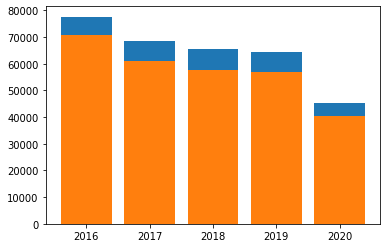

In [7]:
# Yearwise relevant articles(blue) and type 'News' articles(orange)
type_news = [stats_dict[year]['News'] for year in stats_dict]
plt.bar(list(stats_dict.keys()), year_totals)
plt.bar(list(stats_dict.keys()), type_news)
plt.show()

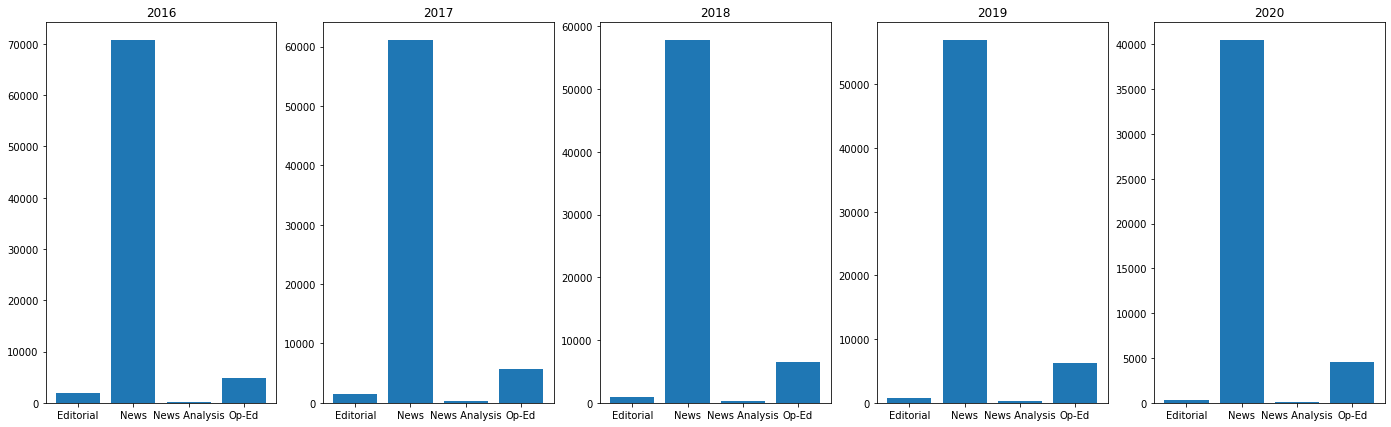

In [8]:
# Plotting stats_dict yearwise
fig,ax = plt.subplots(1,5,figsize=(24,7))
for i,year in enumerate(stats_dict.keys()):
    lists = sorted(stats_dict[year].items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    ax[i].bar(x, y)
    ax[i].set_title(str(year))
plt.show()

## Get **Section** distribution in the articles of type **News**

In [9]:
section_dict = {}

for year in range(2016,2021):
    print("Year:",year,end='')
    # Initializing the section_dict structure
    section_dict[year] = {}

    for month in range(1,13):
        print(".",end='')
        time.sleep(6) # Adding time delay to not hit API calls per minute limit
        url = 'https://api.nytimes.com/svc/archive/v1/'+str(year)+'/'+str(month)+'.json?&api-key='+ny_api_key
        response = requests.get(url)
        if response.status_code !=200:
            print("API Error!\n")
            break
        articles = response.json()['response']['docs']
        # Filtering articles which have 'type_of_material' key as 'News'
        articles = [a for a in articles if 'type_of_material' in a]
        relevant_articles = [a for a in articles if a['type_of_material'] == 'News']
        # Check section and update section_dict
        for a in relevant_articles:
            try:
                if a['section_name'] not in section_dict[year]:
                    section_dict[year][a['section_name']] = 0
                section_dict[year][a['section_name']]+=1
            except:
                pass
    print('\n')

Year: 2016............

Year: 2017............

Year: 2018............

Year: 2019............

Year: 2020..........API Error!





In [10]:
for year in section_dict:
    sorted_d = {k: v for k, v in sorted(section_dict[year].items(), key=lambda item: item[1], reverse=True)}
    print(year, list(sorted_d.items())[:5])

2016 [('U.S.', 10361), ('World', 9558), ('Business Day', 6962), ('Sports', 6848), ('Arts', 5069)]
2017 [('World', 8399), ('U.S.', 8266), ('Business Day', 6105), ('Sports', 5214), ('Arts', 5140)]
2018 [('U.S.', 4987), ('World', 4727), ('Business Day', 3163), ('Sports', 2920), ('Arts', 2905)]
2019 [('U.S.', 10781), ('World', 7677), ('Arts', 5349), ('Business Day', 4665), ('Sports', 4256)]
2020 [('U.S.', 8843), ('World', 4638), ('Business Day', 3813), ('Arts', 3416), ('Sports', 2463)]


Every year, majority articles of the **News** is either on sections: **U.S** or **World**

# Guardian

In [12]:
# Guardian API Key
g_api_key = 'bcf0c5ca-6041-4073-9247-cdd4242543b7'

## Get relevant article type distribution

In [14]:
url = 'http://content.guardianapis.com/search'
# Date Format - 2014-02-17
params = {'from-date': 0,
        'to-date': '2019-01-31',
        'show-fields': 'all',
        'page':1,
        'page-size': 50,
        'api-key': g_api_key}

# Dict to store article type stats per year
stats_dict = {}

for year in range(2016,2021):
    print("Year",year,end='')
    # Dict per year
    stats_dict[year] = {}
    params['from-date'] = str(year)+'-01-01'
    params['to-date'] = str(year)+'-12-31'
    params['page'] = 1
    # Extra call necessary to get number of pages 
    response = requests.get(url, params)
    if response.status_code !=200:
        print("API Error!\n")
        break
    pages = response.json()['response']['pages']
    current_page = 1
    while current_page <= 30:
        print(".",end='')
        # Update page
        params['page'] = current_page
        # Updated call
        response = requests.get(url, params)
        if response.status_code !=200:
            print("API Error!\n")
            break
        articles = response.json()['response']['results']
        for a in articles:
            if a['type'] not in stats_dict[year]:
                stats_dict[year][a['type']] = 0
            stats_dict[year][a['type']]+=1 
            
        current_page+=1
        time.sleep(5) # Adding time delay to not hit API calls per minute limit
    print('')

Year 2016..............................
Year 2017..............................
Year 2018..............................
Year 2019..............................
Year 2020..............................


In [15]:
stats_dict

{2016: {'article': 1451, 'crossword': 16, 'interactive': 4, 'liveblog': 29},
 2017: {'article': 1444, 'crossword': 19, 'interactive': 7, 'liveblog': 30},
 2018: {'article': 1433, 'crossword': 22, 'interactive': 7, 'liveblog': 38},
 2019: {'article': 1429, 'crossword': 21, 'interactive': 7, 'liveblog': 43},
 2020: {'article': 1420, 'crossword': 7, 'interactive': 7, 'liveblog': 66}}

## Get **Section** distribution in the articles of type **article**

In [19]:
url = 'http://content.guardianapis.com/search'
# Date Format - 2014-02-17
params = {'from-date': 0,
        'to-date': '2019-01-31',
        'show-fields': 'all',
        'page':1,
        'page-size': 50,
        'api-key': g_api_key}

# Dict to store article type stats per year
section_dict = {}

for year in range(2016,2021):
    print("Year",year,end='')
    # Dict per year
    section_dict[year] = {}
    params['from-date'] = str(year)+'-01-01'
    params['to-date'] = str(year)+'-12-31'
    params['page'] = 1
    # Extra call necessary to get number of pages 
    response = requests.get(url, params)
    if response.status_code !=200:
        print("API Error!\n")
        break
    pages = response.json()['response']['pages']
    current_page = 1
    while current_page <= 30:
        print(".",end='')
        # Update page
        params['page'] = current_page
        # Updated call
        response = requests.get(url, params)
        if response.status_code !=200:
            print("API Error!\n")
            break
        articles = response.json()['response']['results']
        relevant_articles = [a for a in articles if a['type'] == 'article']
        for a in relevant_articles:
            if a['sectionName'] not in section_dict[year]:
                section_dict[year][a['sectionName']] = 0
            section_dict[year][a['sectionName']]+=1 
        current_page+=1
        time.sleep(5) # Adding time delay to not hit API calls per minute limit
    print('')

Year 2016..............................
Year 2017..............................
Year 2018..............................
Year 2019..............................
Year 2020..............................


In [20]:
for year in section_dict:
    sorted_d = {k: v for k, v in sorted(section_dict[year].items(), key=lambda item: item[1], reverse=True)}
    print(year, list(sorted_d.items())[:5])

2016 [('Football', 156), ('World news', 137), ('Opinion', 106), ('Sport', 94), ('Life and style', 70)]
2017 [('Football', 147), ('Opinion', 140), ('World news', 128), ('Sport', 108), ('Life and style', 99)]
2018 [('Opinion', 150), ('Football', 135), ('World news', 133), ('Sport', 96), ('Life and style', 89)]
2019 [('Football', 157), ('Opinion', 130), ('World news', 129), ('Life and style', 95), ('Sport', 87)]
2020 [('World news', 199), ('Opinion', 109), ('Football', 106), ('Sport', 101), ('Australia news', 90)]


Every year, majority articles of the **News** is either on sections: **Football**, **World news** or **Opinion**

# Considering 1 month of articles (Jan 2020)

## And comparing the World news sections

## NY Times

In [21]:
def get_ny_times_articles(key, month, year):
    url = 'https://api.nytimes.com/svc/archive/v1/'+str(year)+'/'+str(month)+'.json?&api-key='+key
    response = requests.get(url)
    if response.status_code !=200:
        print("API Error!\n")
        return
    return response.json()['response']['docs']

In [28]:
ny_articles = get_ny_times_articles(ny_api_key, 1, 2020)
# Exluding section 'Podcasts' since it does not have the key 'type_of_material'
ny_articles = [a for a in ny_articles if a['section_name'] != 'Podcasts']
# Consider Section 'World' of 'News'
ny_articles = [a for a in ny_articles if a['type_of_material'] == 'News' and a['section_name'] == 'World']
len(ny_articles)

649

In [29]:
# Get headlines
ny_headlines = [a['headline']['main'] for a in ny_articles]

In [30]:
ny_headlines[:10]

['‘Nowhere Else to Go’: Some Defy Warnings to Flee Australian Fires',
 'Netanyahu Seeks Immunity From Israeli Corruption Charges',
 'Pika-Who? How Pokémon Go Confused the Canadian Military',
 'As India Violence Gets Worse, Police Are Accused of Abusing Muslims',
 'Israel Lauds Suleimani Assassination, Though With Caution',
 'The Lesson of an Albanian Earthquake: The Balkans Aren’t Ready for the Big One',
 'Israel Lauds Suleimani Assassination, Though With Caution',
 'The Lesson of an Albanian Earthquake: The Balkans Aren’t Ready for the Big One',
 'U.S. Strike in Iraq Kills Qassim Suleimani, Commander of Iranian Forces',
 'What to Know About the Death of Iranian General Suleimani']

## Guardian

In [32]:
def get_guardian_articles(key, month, year):
    url = 'http://content.guardianapis.com/search'
    params = {'from-date': str(year) + '-' + str(month) + '-01',
            'to-date': str(year) + '-' + str(month) + '-31',
            'show-fields': 'all',
            'page':1,
            'page-size': 50,
            'api-key': key}
    # Get number of pages
    response = requests.get(url, params)
    pages = response.json()['response']['pages']
    articles = []
    for p in range(pages):
        params['page'] = p+1
        response = requests.get(url, params)
        articles+= (response.json()['response']['results'])
        time.sleep(5) # Adding time delay to not hit API calls per minute limit
    return articles


In [33]:
g_articles = get_guardian_articles(g_api_key, 1, 2020)

In [34]:
# Consider Section 'World news' of 'article'
g_articles = [a for a in g_articles if a['type']=='article' and a['sectionName'] == 'World news']
len(g_articles)

660

In [35]:
g_headlines = [a['fields']['headline'] for a in g_articles]

In [36]:
g_headlines[:10]

['Coronavirus: first human transmission in Thailand as death toll hits 258',
 'Coronavirus: US bars foreign nationals who have recently travelled to China',
 "Weinstein trial: key witness describes film producer's 'Jekyll and Hyde' nature",
 "Religious freedom bill's latest draft 'unacceptable and does not protect human rights'",
 'Britons on evacuation flight from Wuhan tell of relief and confusion',
 'Our face mask future: Do they really help beat flu, coronavirus and pollution?',
 'US underprepared for coronavirus due to Trump cuts, say health experts',
 'Families uneasy at proximity to coronavirus quarantine site',
 'Syria: pro-Assad forces batter Idlib and spark fears of fresh crisis',
 'Greece defends anti-migrant floating barrier amid growing criticism']